### Fitting model to SANS data
The purpose of this notebook is to illustrate how sphere model can be fitted to data generated with McStas. 

In [1]:
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasdata.dataloader.loader import Loader

from bumps.names import FitProblem
from bumps.fitters import fit
from bumps.formatnum import format_uncertainty

import numpy as np

### Data loading and setting parameters
For given data set one needs to load data and choose starting parameters for the model. These parameters are usually our best guest and optimizers usually do a good job of fining the minimum. However since inferring models from SANS data is an ill-posed problem, fitting may lead to optimized but non-physical parameters. Therefore one needs to be careful when performing fitting. Not all parameters needs to be fitted. 

In [2]:
#Loading data 
loader = Loader()
data = loader.load('sans_iofq.dat')

#Setting up boundaries and masks (in most cases we are interested in full range and non-masking as it is demonstrated here)
data = data[0]
data.qmin = data.xmin
data.qmax = data.xmax
data.mask = np.isnan(data.y)

#Here we define model and starting parameters for the model
kernel = load_model('sphere')
pars = dict(radius=60,
                background=0.01,
                scale=1.0,
                sld=1,
                sld_solvent=6)
    
model = Model(kernel, **pars)

# And here we define, which parameters will be fitted and what is acceptable range
model.radius.range(50, 100)
model.background.range(0, 0.1)
model.scale.range(0, 0.1)


Parameter(scale)

### Bumps fitting
bumps is an optimizer that sasmodels package uses. In this section we couple model with data

In [3]:
M = Experiment(data=data, model=model)
problem = FitProblem(M)

### Initial fit
Here we can check how the model with our starting parameters fit to data. We can see that model fit (contnous line) is far off from data, which is also reflected on residuals plot and by the high chi^2 value

Initial chisq 7513320908.215561


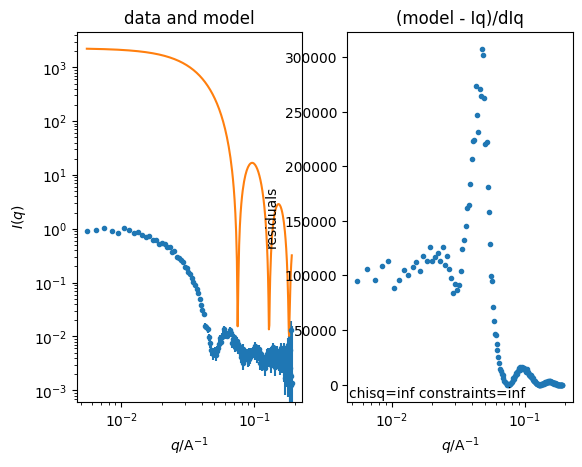

In [4]:
print(f"Initial chisq {problem.chisq()}")
problem.plot()

### Fit and inferred parameters
Eventually we can perform fitting and check if we get good agreement with data and our expectations (if fitted parameters give reasonable values).

.background = 0.00378458 in [0,0.1]
.radius = 90.4444 in [50,100]
.radius_pd = 0
.radius_pd_n = 35
.radius_pd_nsigma = 3
.scale = 0.000138062 in [0,0.1]
.sld = 1
.sld_M0 = 0
.sld_mphi = 0
.sld_mtheta = 0
.sld_solvent = 6
.sld_solvent_M0 = 0
.sld_solvent_mphi = 0
.sld_solvent_mtheta = 0
.up_frac_f = 0
.up_frac_i = 0
.up_phi = 0
.up_theta = 90

[chisq=1.378(19), nllf=129.536]


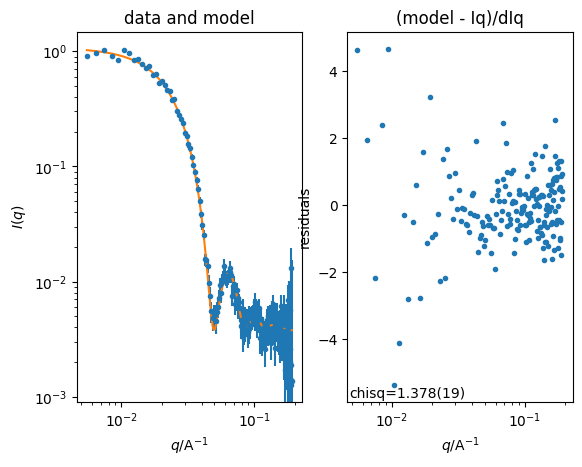

In [11]:
result = fit(problem)
problem.show()
problem.plot()